## Dataset

##### Classify if the GAN-face is wearing glasses or not
This dataset is from a Kaggle project from the course T81-855: Applications of Deep Learning at Washington University in St. Louis. For this competition, students were to determine if a person is wearing glasses or not. However, your test subjects are not real people. A Generative Adversarial Neural Network (GAN) created all of the people that you see in this competition.

### Acknowledgement

https://www.kaggle.com/datasets/jeffheaton/glasses-or-no-glasses

In [1]:
from keras.models import load_model
import numpy as np
from skimage import io
from custom_argument import InstanceNormalization  
import matplotlib.pyplot as plt

arguments = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('./weights/g_model_AtoB_037500.h5', arguments)
model_BtoA = load_model('./weights/g_model_BtoA_037500.h5', arguments)

im = io.imread('./no_glass/Image_3.png')
im_input =(im-127.5)/127.5
inputs=np.expand_dims(im_input, axis=0)

A_generated  = model_BtoA.predict(inputs)
B_reconstructed = model_AtoB.predict(A_generated)

(-0.5, 255.5, 255.5, -0.5)

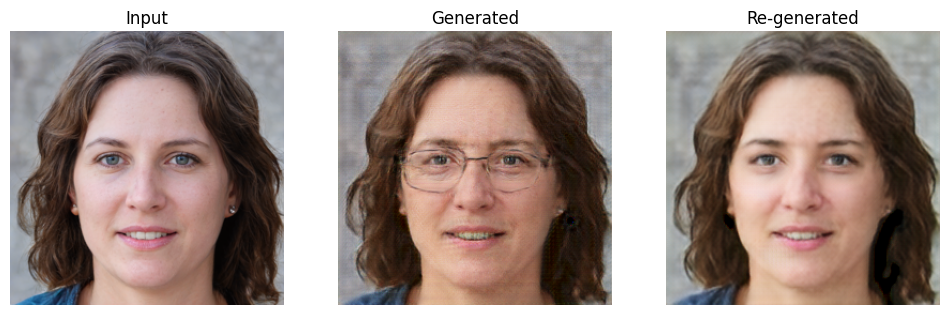

In [2]:
I1=(A_generated+1)/2.0
I2=(B_reconstructed+1)/2.0

plt.figure(figsize=(12,8))
plt.subplot(131)
plt.imshow(im)
plt.title('Input')
plt.axis('off')
plt.subplot(132)
plt.imshow(I1[0,:,:,:])
plt.title('Generated')
plt.axis('off')
plt.subplot(133)
plt.imshow(I2[0,:,:,:])
plt.title('Re-generated')
plt.axis('off')